In [1]:
import pyedflib
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
import time
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, \
    PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pickle
from scipy.signal import butter, lfilter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, \
    PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pickle
from scipy.signal import butter, lfilter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy import stats
import random
import os

In [2]:
file_name = "normal\chb01_01.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#removing the first and last 5% of data
m = f.getNSamples()[0]
length = int(m - (m/10))
start = int(m/20)
end = m - start
print(m, length, start , end)
norm_data = np.zeros((n,length))
for i in np.arange(n):
        norm_data[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/(256*5))
print(k)
normal = []
for i in range(0, 71):
    normal.append(norm_data[:,i*256:(i*256)+5*256])

921600 829440 46080 875520
648


In [3]:
file_name = "normal\chb01_02.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#removing the first and last 5% of data
m = f.getNSamples()[0]
length = int(m - (m/10))
start = int(m/20)
end = m - start
print(m, length, start , end)
norm_data = np.zeros((n,length))
for i in np.arange(n):
        norm_data[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/(256*5))
print(k)

for i in range(0, 71):
    normal.append(norm_data[:,i*256:(i*256)+5*256])

921600 829440 46080 875520
648


In [4]:
file_name = "normal\chb01_05.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#removing the first and last 5% of data
m = f.getNSamples()[0]
length = int(m - (m/10))
start = int(m/20)
end = m - start
print(m, length, start , end)
norm_data = np.zeros((n,length))
for i in np.arange(n):
        norm_data[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/(256*5))
print(k)

for i in range(0, 71):
    normal.append(norm_data[:,i*256:(i*256)+5*256])

921600 829440 46080 875520
648


In [5]:
file_name = "seizures\chb01_03.edf"
f = pyedflib.EdfReader(file_name)
n = 2
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 2996 * 256
end = 3036 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)
seizure = []
for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 10240 766976 777216
35


In [6]:
#getting normal from seizure file
m = f.getNSamples()[0]
start = 2996 * 256
end = 3036 * 256
length = end - start
length = m - length
print(m, length, start , end)
norm_data = np.zeros((n, length))
for i in np.arange(n):
        norm_data[i,:start] = sigbufs[i,:start]
        norm_data[i,start:] = sigbufs[i,end:]
        
#removing the first and last 5% of data
m = length
length = int(m - (m/10))
start = int(m/20)
end = m - start
print(m, length, start , end)
norm_data = np.zeros((n,length))
for i in np.arange(n):
        norm_data[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/(256*5))
print(k)

for i in range(0, 35):
    normal.append(norm_data[:,i*256:(i*256)+5*256])

921600 911360 766976 777216
911360 820224 45568 865792
640


In [7]:
file_name = "seizures\chb01_04.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 1467 * 256
end = 1494 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 6912 375552 382464
22


In [8]:
#getting normal from seizure file
m = f.getNSamples()[0]
start = 2996 * 256
end = 3036 * 256
length = end - start
length = m - length
print(m, length, start , end)
norm_data = np.zeros((n, length))
for i in np.arange(n):
        norm_data[i,:start] = sigbufs[i,:start]
        norm_data[i,start:] = sigbufs[i,end:]
        
#removing the first and last 5% of data
m = length
length = int(m - (m/10))
start = int(m/20)
end = m - start
print(m, length, start , end)
norm_data = np.zeros((n,length))
for i in np.arange(n):
        norm_data[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/(256*5))
print(k)

for i in range(0, 36):
    normal.append(norm_data[:,i*256:(i*256)+5*256])

921600 911360 766976 777216
911360 820224 45568 865792
640


In [9]:
file_name = "seizures\chb01_15.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 1732 * 256
end = 1772 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 10240 443392 453632
35


In [10]:
file_name = "seizures\chb01_16.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 1015 * 256
end = 1066 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 13056 259840 272896
46


In [11]:
file_name = "seizures\chb01_18.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 1720 * 256
end = 1810 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 23040 440320 463360
85


In [12]:
file_name = "seizures\chb01_21.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 327 * 256
end = 420 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 23808 83712 107520
88


In [13]:
file_name = "seizures\chb01_26.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 1862 * 256
end = 1963 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

595200 25856 476672 502528
96


In [14]:
file_name = "seizures\chb02_16.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 130 * 256
end = 212 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

245504 20992 33280 54272
77


In [15]:
file_name = "seizures\chb02_16+.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 2972 * 256
end = 3053 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 20736 760832 781568
76


In [16]:
file_name = "seizures\chb02_19.edf"
f = pyedflib.EdfReader(file_name)
n = 2
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i+16)
        
#getting the seizure part
m = f.getNSamples()[0]
start = 3369 * 256
end = 3378 * 256
length = end - start
print(m, length, start , end)
norm_s = np.zeros((n, length))
for i in np.arange(n):
        norm_s[i,:] = sigbufs[i,start:end]
        
#getting 5 secs
# data sampling rate is 256 and we want windows of 5 seconds
k = int(length/256)-5
print(k)

for i in range(0, k):
    seizure.append(norm_s[:,i*256:(i*256)+5*256])

921600 2304 862464 864768
4


In [17]:
print(len(normal))
len(seizure)

284


564

In [18]:
x_normal = np.array(normal)
x_seizure = np.array(seizure)
sampling_freq = 256 #based on info from website

b, a = butter(3, [0.5,40], btype='bandpass',fs=sampling_freq)

x_normal_filtered = np.array([lfilter(b,a,x_normal[ind,:]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[ind,:]) for ind in range(x_seizure.shape[0])])
print(x_normal.shape)
print(x_seizure.shape)

x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

x_cnn = np.concatenate((x_normal,x_seizure))
y_cnn = np.concatenate((np.zeros((284,1)),np.ones((564,1))))

print(x_cnn.shape)

(284, 2, 1280)
(564, 2, 1280)
(848, 2, 1280)


In [19]:
x=[]
for i in range(len(x_cnn)):
    for j in range(len(x_cnn[i])):
        x.append(x_cnn[i][j])
np.concatenate((np.zeros((568,1)),np.ones((568,1))))
x=np.array(x)
y=np.concatenate((np.zeros((568,1)),np.ones((1128,1))))

In [20]:
#my code from phase 2
SVCArrayAcc = []
KNNArrayAcc = []
forestArrayAcc = []
SVCF1Array = []
KNNF1Array = []
forestF1Array = []
presSVCArray = []
presKNNArray = []
pressForestArray = []
recallSVCArray = []
recallKNNArray = []
recallForestArray = []
confusionArray = []
# arrays from phase2:
modeArray = []
modeArray1D = []
meanArray = []
meanArray1D = []
medienArray = []
medienArray1D = []
varianceArray = []
varianceArray1D = []
sdArray = []
sdArray1D = []
kurtosisArray = []
kurtosisArray1D = []
cvArray = []
cvArray1D = []
skewnessArray = []
skewnessArray1D = []
minArray = []
minArray1D = []
maxArray = []
maxArray1D = []
PTPArray = []
PTPArray1D = []
TWOPPArray = []
TWOPPArray1D = []
PPSArray = []
PPSArray1D = []
shanonarray = []
shanonarray1D = []
reyniArray = []
reyniArray1D = []
avarageF1Array = []
arrayForFinalClassification = []
f1dict = {}
f2dict = {}
index = 1
numberOfData=1696
averageMode = 'binary'
finalx = []
seed=57

for i in range(numberOfData):
    newArray2 = []
    # mode
    mode = stats.mode(x[i])
    newArray = []
    newArray.append(mode[0][0])
    # a 1D array of all modes
    modeArray1D.append(mode[0][0])
    newArray2.append(mode[0][0])
    # a 2D array of all modes cause classifications need 2D arrays
    modeArray.append(newArray)

    # median
    median = np.median(x[i])
    newArray = []
    newArray2.append(median)
    medienArray1D.append(median)
    newArray.append(median)
    medienArray.append(newArray)
    # mean
    mean = np.mean(x[i], dtype=np.float64)
    newArray = []
    newArray2.append(mean)
    meanArray1D.append(mean)
    newArray.append(mean)
    meanArray.append(newArray)
    # variance
    variance = np.var(x[i], dtype=np.float64)
    newArray = []
    newArray2.append(variance)
    varianceArray1D.append(variance)
    newArray.append(variance)
    varianceArray.append(newArray)
    # standard deviation
    newArray = []
    sd = np.std(x[i], dtype=np.float64)
    newArray2.append(sd)
    newArray.append(sd)
    sdArray1D.append(sd)
    sdArray.append(newArray)
    # kurtosis
    kurtosis = stats.kurtosis(x[i])
    newArray = []
    newArray2.append(kurtosis)
    kurtosisArray1D.append(kurtosis)
    newArray.append(kurtosis)
    kurtosisArray.append(newArray)
    # coefficient of variation
    newArray = []
    CV = np.std(x[i], dtype=np.float64) / np.mean(x[i], dtype=np.float64)
    newArray.append(CV)
    newArray2.append(CV)
    cvArray1D.append(CV)
    cvArray.append(newArray)
    # skewness
    newArray = []
    skewness = stats.skew(x[i])
    newArray2.append(skewness)
    newArray.append(skewness)
    skewnessArray1D.append(skewness)
    skewnessArray.append(newArray)
    # min
    newArray = []
    minAmount = min(x[i])
    newArray.append(minAmount)
    newArray2.append(minAmount)
    minArray1D.append(minAmount)
    minArray.append(newArray)
    # max
    newArray = []
    maxAmount = max(x[i])
    newArray.append(maxAmount)
    newArray2.append(maxAmount)
    maxArray1D.append(maxAmount)
    maxArray.append(newArray)
    # PTP
    newArray = []
    distance = max(x[i]) - min(x[i])
    PTPArray1D.append(distance)
    newArray.append(distance)
    newArray2.append(distance)
    PTPArray.append(newArray)
    # TWOPP
    newArray = []
    resultMaxArray = np.where(x[i] == np.amax(x[i]))
    resultMax = resultMaxArray[0][0]
    maxTime = resultMax / 173.61
    resultMinArray = np.where(x[i] == np.amin(x[i]))
    resultMin = resultMinArray[0][0]
    minTime = resultMin / 173.61
    newArray.append(maxTime - minTime)
    newArray2.append(maxTime - minTime)
    TWOPPArray1D.append(maxTime - minTime)
    TWOPPArray.append(newArray)
    # PPS
    newArray = []
    PPS = distance / (maxTime - minTime)
    newArray.append(PPS)
    newArray2.append(PPS)
    PPSArray1D.append(PPS)
    PPSArray.append(newArray)
    # shanon
    newArray = []
    shanonduct = {}
    for j in x[i]:
        if j in shanonduct:
            shanonduct[j] = shanonduct[j] + 1
        else:
            shanonduct[j] = 1
    sumShanon = 0
    for key in shanonduct:
        sumShanon += shanonduct[key]
    # print(sumShanon)
    shanon = 0
    for key in shanonduct:
        shanon += ((shanonduct[key]) / sumShanon) * math.log((shanonduct[key]) / sumShanon, 2)
    newArray.append(shanon * (-1))
    shanonarray1D.append(shanon * (-1))
    newArray2.append(shanon * (-1))
    shanonarray.append(newArray)
    # log Energy
    # loge = 0
    # for j in x[i]:
    #     print(j * j)
    #     loge += math.log(j * j, 2)
    # newArray.append(loge)
    # Renyi
    newArray = []
    renyiSum = 0
    for key in shanonduct:
        renyiSum += ((shanonduct[key]) / sumShanon) * ((shanonduct[key]) / sumShanon)
    renyi = math.log(renyiSum, 2)
    newArray.append(renyi)
    newArray2.append(renyi)
    reyniArray1D.append(renyi)
    reyniArray.append(newArray)
    arrayForFinalClassification.append(newArray2)
fBonusdict = {}
f2dict[0] = modeArray1D
f2dict[1] = medienArray1D
f2dict[2] = meanArray1D
f2dict[3] = varianceArray1D
f2dict[4] = sdArray1D
f2dict[5] = kurtosisArray1D
f2dict[6] = cvArray1D
f2dict[7] = skewnessArray1D
f2dict[8] = minArray1D
f2dict[9] = maxArray1D
f2dict[10] = PTPArray1D
f2dict[11] = TWOPPArray1D
f2dict[12] = PPSArray1D
f2dict[13] = shanonarray1D
f2dict[14] = reyniArray1D

fBonusdict[0] = modeArray1D
fBonusdict[1] = medienArray1D
fBonusdict[2] = meanArray1D
fBonusdict[3] = varianceArray1D
fBonusdict[4] = sdArray1D
fBonusdict[5] = kurtosisArray1D
fBonusdict[6] = cvArray1D
fBonusdict[7] = skewnessArray1D
fBonusdict[8] = minArray1D
fBonusdict[9] = maxArray1D
fBonusdict[10] = PTPArray1D
fBonusdict[11] = TWOPPArray1D
fBonusdict[12] = PPSArray1D
fBonusdict[13] = shanonarray1D
fBonusdict[14] = reyniArray1D

print(x.shape)
print(y.shape)
finalxNump = np.array(finalx)
finalArrays = []
finalArrays.append(modeArray)
finalArrays.append(medienArray)
finalArrays.append(meanArray)
finalArrays.append(varianceArray)
finalArrays.append(sdArray)
finalArrays.append(kurtosisArray)
finalArrays.append(cvArray)
finalArrays.append(skewnessArray)
finalArrays.append(minArray)
finalArrays.append(maxArray)
finalArrays.append(PTPArray)
finalArrays.append(TWOPPArray)
finalArrays.append(PPSArray)
finalArrays.append(shanonarray)
finalArrays.append(reyniArray)
n_splits = 5
indexOfIncorrectsDict = {}
cv = KFold(n_splits, random_state=seed, shuffle=True)
for i in range(15):
    indexOfIncorrectsDict[i] = {}
    finalxNump = []
    finalxNump = finalArrays[i]
    finalxNump = np.array(finalxNump)
    # normalize
    scaler = MinMaxScaler(feature_range=(0, 1))
    finalxNump = scaler.fit_transform(finalxNump)
    # print("shape: ", finalxNump.shape)
    recallForestArray = []
    pressForestArray = []
    forestArrayAcc = []
    forestF1Array = []
    indexOfIncorrects = 0
    for train_index, test_index in cv.split(finalxNump):
        x_train, y_train = finalxNump[train_index], y[train_index]
        x_test, y_test = finalxNump[test_index], y[test_index]
        # x_train, x_test, y_train, y_test = train_test_split(finalxNump, y, test_size=0.20)
        indexOfIncorrectsDict[i][indexOfIncorrects] = []
        rf = RandomForestClassifier(n_estimators=1000, random_state=0)
        # rf=DecisionTreeClassifier(max_depth=4,criterion='entropy',max_features=0.6,splitter='best')
        rf.fit(x_train, y_train.ravel())
        pred_forest = rf.predict(x_test)
        for j in range(len(pred_forest)):
            if pred_forest[j] != y_test[j]:
                indexOfIncorrectsDict[i][indexOfIncorrects].append(j)
        presForest = precision_score(y_test, pred_forest, zero_division=1, average=averageMode)
        recallForest = recall_score(y_test, pred_forest, zero_division=1, average=averageMode)
        recallForestArray.append(recallForest)
        pressForestArray.append(presForest)
        rfAcc = accuracy_score(y_test, pred_forest)
        forestArrayAcc.append(rfAcc)
        forestF1Array.append((2 * presForest * recallForest) / (presForest + recallForest))
        indexOfIncorrects += 1
    f1dict[i] = sum(forestF1Array) / len(forestF1Array)
keyMax = max(f1dict.keys(), key=f1dict.get)
corrdict = {}
finalxNump = finalArrays[keyMax]
del fBonusdict[keyMax]
finalBonusIndexes = []
finalBonusIndexes.append(keyMax)
bonusIndex = 1
lastIncorrectIndexDict = indexOfIncorrectsDict[keyMax]
checkIndexDict = indexOfIncorrectsDict[keyMax]
for i in range(14):
    newIncorrectIndexDict = {}
    keysList = list(fBonusdict.keys())
    maxIndex = 0
    maxChanges = -1000000
    for j in keysList:
        for k in range(numberOfData):
            finalxNump[k].append(fBonusdict[j][k])
        finalxNumpTest = np.array(finalxNump)
        scaler = MinMaxScaler(feature_range=(0, 1))
        indexOfIncorrects = 0
        fixedData = 0
        newIncorrectIndexDict[j] = {}
        finalxNumpTest = scaler.fit_transform(finalxNumpTest)
        for train_index, test_index in cv.split(finalxNumpTest):
            x_train, y_train = finalxNumpTest[train_index], y[train_index]
            x_test, y_test = finalxNumpTest[test_index], y[test_index]
            newIncorrectIndexDict[j][indexOfIncorrects] = []
            rf = RandomForestClassifier(n_estimators=1000, random_state=0)
            # rf = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')
            rf.fit(x_train, y_train.ravel())
            pred_forest = rf.predict(x_test)
            for z in range(len(pred_forest)):
                if pred_forest[z] == y_test[z]:

                    if z in lastIncorrectIndexDict[indexOfIncorrects]:
                        # print("yes for z=",z)
                        fixedData += 1
                else:
                    # print("in j=", j, " and indexOfIncorrects=", indexOfIncorrects, "z= ", z)
                    if z not in lastIncorrectIndexDict[indexOfIncorrects]:
                        # print("no for z=",z)
                        fixedData -= 1
                    newIncorrectIndexDict[j][indexOfIncorrects].append(z)
            indexOfIncorrects += 1
        # print("fixed data for j=",j," is: ",fixedData)
        if fixedData > maxChanges:
            maxChanges = fixedData
            maxIndex = j
        for k in range(numberOfData):
            del finalxNump[k][bonusIndex]
    if maxChanges >= 1:
        finalBonusIndexes.append(maxIndex)
        # print("max changes:", maxChanges, "index:", maxIndex)
        for k in range(numberOfData):
            finalxNump[k].append(fBonusdict[maxIndex][k])
        lastIncorrectIndexDict = newIncorrectIndexDict[maxIndex]
        bonusIndex += 1
        del fBonusdict[maxIndex]
    else:
        break
for i in range(15):
    if 14 - i not in finalBonusIndexes:
        for j in range(numberOfData):
            arrayForFinalClassification[j].pop(14 - i)
#arrayForFinalClassification = np.array(arrayForFinalClassification)
#print(arrayForFinalClassification.shape)
print("done")

<ipython-input-20-5432e08f35c1>:59: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(x[i])


(1696, 1280)
(1696, 1)
done


In [21]:
from tensorflow.keras.models import Sequential
test_portion=0.2
numberOfDataCnn=848
numberOfTest=numberOfDataCnn*0.2
numberOfTrain=numberOfDataCnn*0.8
shuffleSize=380
BATCH_SIZE = 256
BUFFER_SIZE = 1000
seed=57
EPOCHS=12
input_size = (1280,2)
maxval = np.amax(x_cnn)
newX_cnn=[]
print(x_cnn.shape)
for i in range(len(x_cnn)):
    newArray=[]
    for j in range(len(x_cnn[i][0])):
        #print(len(x_cnn[i]))
        newArray2=[]
        newArray2.append(x_cnn[i][0][j])
        newArray2.append(x_cnn[i][1][j])
        newArray.append(newArray2)
    newX_cnn.append(newArray)
newX_cnn=np.array(newX_cnn)
#x_cnn=np.array(newX_cnn)
print(newX_cnn.shape)
x_train, x_test, y_train, y_test = train_test_split(newX_cnn,y_cnn,random_state=seed,test_size=test_portion)
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
print(x_train.shape)
#x_train, x_test = x_train.reshape((numberOfTrain,2,1280)), x_test.reshape((numberOfTest,2,1280))
x_train, x_test = x_train / maxval, x_test / maxval

y_train = tf.one_hot(y_train,2)
y_test = tf.one_hot(y_test,2)
y_trainNew=[]
y_testNew=[]
for i in range(len(y_train)):
    newArray=[];
    for j in range(len(y_train[i][0])):
        newArray.append(y_train[i][0][j])    
    y_trainNew.append(newArray)

for i in range(len(y_test)):
    newArray=[];
    for j in range(len(y_test[i][0])):
        newArray.append(y_test[i][0][j])    
    y_testNew.append(newArray)
    
y_trainNew=np.array(y_trainNew)
y_testNew=np.array(y_testNew)


train_data = tf.data.Dataset.from_tensor_slices((x_train, y_trainNew))
train_data = train_data.shuffle(shuffleSize).batch(BATCH_SIZE)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_testNew))
test_data = test_data.shuffle(shuffleSize).batch(BATCH_SIZE)

inputs = tf.keras.Input(shape=input_size)
#model = Sequential()
#model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1280,2)))
#model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(layers.MaxPooling1D(pool_size=2))
#model.add(layers.MaxPooling1D(pool_size=2))
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu', name="feature"))
#model.add(layers.Dense(2, activation='softmax'))


#model = Sequential()
model=layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
model=layers.Conv1D(filters=64, kernel_size=3, activation='relu')(model)
model=layers.Conv1D(filters=64, kernel_size=3, activation='relu')(model)
model=layers.MaxPooling1D(pool_size=2)(model)
model=layers.MaxPooling1D(pool_size=2)(model)
model=layers.Flatten()(model)
model=layers.Dense(256, activation='relu')(model)
model=layers.Dense(64, activation='relu', name="feature")(model)

outputs=layers.Dense(2, activation='softmax',name="classification")(model)
model = tf.keras.Model(inputs, outputs)
print("done")

(848, 2, 1280)
(848, 1280, 2)
(678, 1280, 2)
done


In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss={'classification': tf.keras.losses.CategoricalCrossentropy()},
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1280, 2)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1278, 64)          448       
                                                                 
 conv1d_1 (Conv1D)           (None, 1276, 64)          12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 1274, 64)          12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 637, 64)          0         
 )                                                               
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 318, 64)          0         
 1D)                                                         

In [23]:
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=test_data)

Epoch 1/12
3/3 [==============================] - 3s 783ms/step - loss: 0.6768 - accuracy: 0.6313 - val_loss: 0.6382 - val_accuracy: 0.6412
Epoch 2/12
3/3 [==============================] - 2s 698ms/step - loss: 0.6172 - accuracy: 0.6711 - val_loss: 0.5794 - val_accuracy: 0.6412
Epoch 3/12
3/3 [==============================] - 2s 753ms/step - loss: 0.5562 - accuracy: 0.6711 - val_loss: 0.5282 - val_accuracy: 0.6412
Epoch 4/12
3/3 [==============================] - 2s 747ms/step - loss: 0.5058 - accuracy: 0.6711 - val_loss: 0.4964 - val_accuracy: 0.6412
Epoch 5/12
3/3 [==============================] - 2s 702ms/step - loss: 0.4716 - accuracy: 0.6711 - val_loss: 0.4753 - val_accuracy: 0.6412
Epoch 6/12
3/3 [==============================] - 2s 729ms/step - loss: 0.4488 - accuracy: 0.6711 - val_loss: 0.4552 - val_accuracy: 0.6412
Epoch 7/12
3/3 [==============================] - 2s 711ms/step - loss: 0.4280 - accuracy: 0.6711 - val_loss: 0.4317 - val_accuracy: 0.6412
Epoch 8/12
3/3 [====

27/27 [==============================] - 1s 29ms/step
(848, 64)


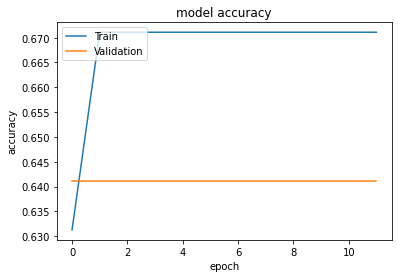

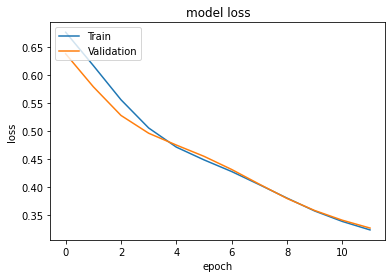

In [24]:
new_Model=tf.keras.Model(inputs, outputs=model.get_layer("feature").output)
cnn_feature_array=new_Model.predict(newX_cnn)
print(cnn_feature_array.shape)
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
for i in range(len(cnn_feature_array)):
    #print(len(arrayForFinalClassification[i*2]))
    arrayForFinalClassification[i*2].extend((cnn_feature_array.tolist())[i])
    arrayForFinalClassification[(i*2)+1].extend((cnn_feature_array.tolist())[i])
arrayForFinalClassification = np.array(arrayForFinalClassification)
print(arrayForFinalClassification.shape)

(1696, 68)


random forest
Confusion Matrix:


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[118   0]
 [  0 222]]


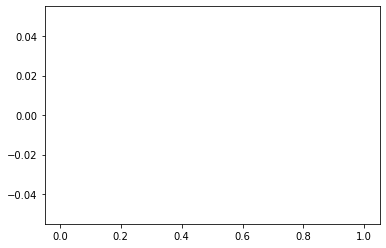

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[122   0]
 [  1 216]]


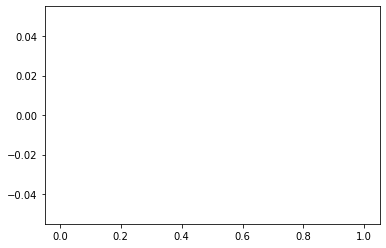

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[106   0]
 [  0 233]]


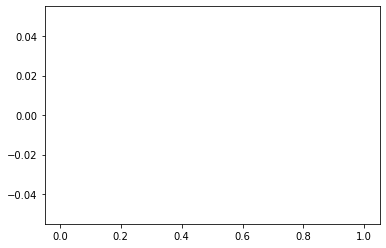

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[112   0]
 [  1 226]]


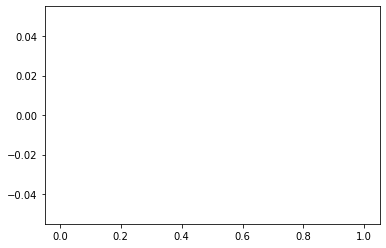

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[110   0]
 [  0 229]]


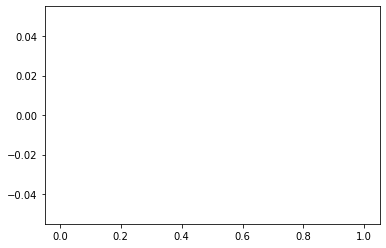

average accuracy: 0.9988200589970502
average precision: 1.0
average recall 0.9981972837451025
average F1 0.9990966051318131
The time of execution of above program is : 2304000 ms


In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
arrayForFinalClassification = scaler.fit_transform(arrayForFinalClassification)
#
# unify3class()
n_splits = 5
cv = KFold(n_splits, random_state=seed, shuffle=True)
recallForestArray = []
pressForestArray = []
forestArrayAcc = []
forestF1Array = []

print("random forest")
print("Confusion Matrix:")

for train_index, test_index in cv.split(arrayForFinalClassification):
    x_train, y_train = arrayForFinalClassification[train_index], y[train_index]
    x_test, y_test = arrayForFinalClassification[test_index], y[test_index]
    # print(x_test.shape)
    # rf = SVC(kernel='linear')
    # rf.fit(x_train, y_train.ravel())
    # pred_forest = rf.predict(x_test)
    # presForest = precision_score(y_test, pred_forest, zero_division=1)
    # recallForest = recall_score(y_test, pred_forest, zero_division=1)
    # recallForestArray.append(recallForest)
    # pressForestArray.append(presForest)
    # rfAcc = accuracy_score(y_test, pred_forest)
    # forestArrayAcc.append(rfAcc)
    # forestF1Array.append((2 * presForest * recallForest) / (presForest + recallForest))

    clusterNumbers = 1
    # make clusters out of train data
    kmeans = KMeans(n_clusters=clusterNumbers, random_state=0).fit(x_train)
    labels = kmeans.labels_
    labels = labels.tolist()
    labelsDic = {}
    labelsDicY = {}
    # append each train data to the coresponding array that is in dictionaries above with their label as their index
    for i in range(len(labels)):
        if labels[i] in labelsDic.keys():
            labelsDic[labels[i]].append(x_train[i])
            labelsDicY[labels[i]].append(y_train[i])
        else:
            labelsDic[labels[i]] = []
            labelsDic[labels[i]].append(x_train[i])
            labelsDicY[labels[i]] = []
            labelsDicY[labels[i]].append(y_train[i])

    classifiers = []
    # train classifiers based on clusters and add them in their labels order to classifiers array
    for i in labelsDic.keys():
        # newClassifier = RandomForestClassifier(n_estimators=1000, random_state=0)
        newClassifier = RandomForestClassifier(n_estimators=1000, random_state=0)
        # newClassifier = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')
        newClassifier.fit(np.array(labelsDic[i]), np.array(labelsDicY[i]).ravel())
        classifiers.append(newClassifier)
    testXDict = {}
    testYDict = {}
    x_testList = x_test.tolist()
    y_testlist = y_test.tolist()
    for i in range(len(x_testList)):

        toPredict = []
        toPredict.append(x_testList[i])
        index = kmeans.predict(toPredict)[0]
        if index in testXDict.keys():
            testXDict[index].append(x_testList[i])
            testYDict[index].append(y_testlist[i])
        else:
            testXDict[index] = []
            testYDict[index] = []
            testXDict[index].append(x_testList[i])
            testYDict[index].append(y_testlist[i])
    for i in testXDict.keys():
        classifier = classifiers[i]
        pred_forest = classifier.predict(testXDict[i])
        presForest = precision_score(testYDict[i], pred_forest, zero_division=1, average=averageMode)
        recallForest = recall_score(testYDict[i], pred_forest, zero_division=1, average=averageMode)
        recallForestArray.append(recallForest)
        pressForestArray.append(presForest)
        rfAcc = accuracy_score(testYDict[i], pred_forest)
        forestArrayAcc.append(rfAcc)
        if not (presForest + recallForest == 0):
            forestF1Array.append((2 * presForest * recallForest) / (presForest + recallForest))
        else:
            forestF1Array.append(0)
            
        print(confusion_matrix(testYDict[i], pred_forest))
        
        hist = []
        #false alarm
        for j in range(len(pred_forest)):
            if(testYDict[i][j]!=[1.0] and pred_forest[j]==1.0):
                hist.append(j)
        plt.hist(hist)
        plt.show()
               
print("average accuracy:", sum(forestArrayAcc) / len(forestArrayAcc))
print("average precision:", sum(pressForestArray) / len(pressForestArray))
print("average recall", sum(recallForestArray) / len(recallForestArray))
print("average F1", sum(forestF1Array) / len(forestF1Array))
print("The time of execution of above program is :", (end - start) * 10 ** 3, "ms")